In [1]:
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sns
import pandas as pd
import numpy as np
from dataset_cleaning import chicago_cleaning, denver_cleaning, connecticut_cleaning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score

In [2]:
#df = chicago_cleaning()
#df = denver_cleaning()
df = denver_cleaning()

In [10]:
# correlations between sale price and other fields
df_corr = abs(df.corr()).sort_values(by='SEVERITY', ascending=False)[['SEVERITY']]
# a new dataframe including only the relevant predictors
df_small = df[df_corr[df_corr['SEVERITY']>0.05].index.tolist()]
#df_w_lanes = df_small.loc[df_small['LANE_CNT'] != 'NaN']
#df_no_lanes = df_small.drop('LANE_CNT', axis=1)
df = df_small.dropna(axis=0)
df_corr

,SEVERITY
SEVERITY,1.000000
TU1_DRIVER_ACTION_CARELESS DRIVING,0.094270
HARMFUL_EVENT_SEQ_1_BICYCLE WITH OTHER VEHICLE,0.087755
TU1_DRIVER_HUMANCONTRIBFACTOR_PHYSICAL DISABILITY,0.079166
TU1_VEHICLE_TYPE_BICYCLE,0.070924
TU1_VEHICLE_MOVEMENT_MAKING RIGHT TURN,0.070444
TU2_VEHICLE_TYPE_BICYCLE,0.069629
TU1_VEHICLE_MOVEMENT_GOING STRAIGHT,0.061200
HARMFUL_EVENT_SEQ_1_FRONT TO REAR WITH MV IN TRANSPORT,0.058258
TU2_VEHICLE_TYPE_PICKUP TRUCK/UTILITY VAN,0.052150


In [4]:
from sklearn.model_selection import train_test_split
y = df['SEVERITY']
X = df.drop('SEVERITY', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

<AxesSubplot:>

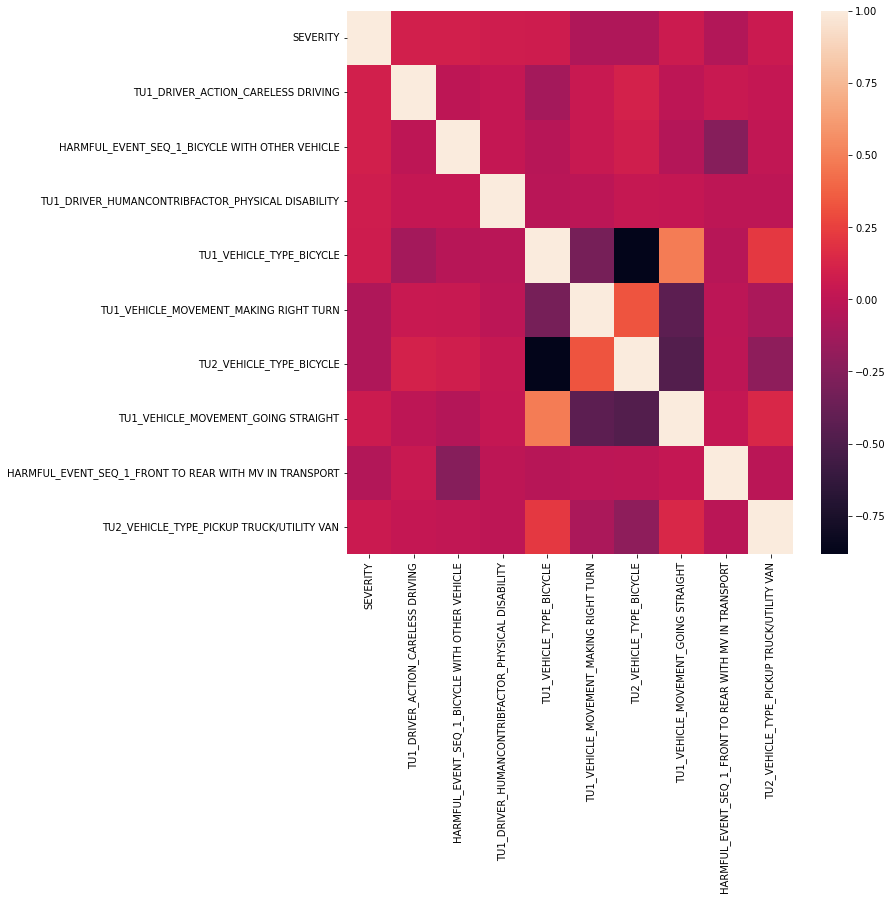

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.abs().corr())

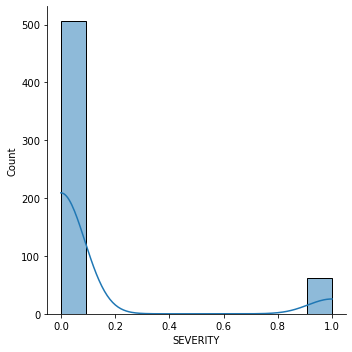

In [6]:
sns.displot(y_test, kde=True)
#stats.probplot(y_train, plot=plt)

In [7]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
Z_train.dropna(inplace=True)
y_train.dropna(inplace=True)
y_train.__contains__('NaN')
y_train.describe()

count    1702.000000
mean        0.128085
std         0.334282
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SEVERITY, dtype: float64

In [8]:
from sklearn.linear_model import RidgeCV
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)


In [9]:
Z_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

ridge_model.score(Z_test, y_test)

0.015915558401317975

In [14]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
print(X_train.columns)

[ 0.  0.  0. -0. -0.  0.]
0.0916256157635468
Index(['Number Of Witnesses ',
       'Type of Intersection Text Format _Y-Intersection                   ',
       'Trafficway Class Text Format _Trafficway, On Road        ',
       'Crash Specific Location Text Format                                                          _Driveway Access-Related                                                                      ',
       'Location of First Harmful Event Text Format _Roadside                                    ',
       'Crash Specific Location Text Format                                                          _Through Roadway                                                                              '],
      dtype='object')
